## The purpose of this notebook is to learn and practice data visualization techniques

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns
import datetime

with open("superstore.csv", "r") as f:
    df = pd.read_csv(f)

In [19]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.00,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [21]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df.describe()

,Row ID,Postal Code,Sales
count,9800.00,9789.00,9800.00
mean,4900.50,55273.32,230.77
std,2829.16,32041.22,626.65
min,1.00,1040.00,0.44
25%,2450.75,23223.00,17.25
50%,4900.50,58103.00,54.49
75%,7350.25,90008.00,210.61
max,9800.00,99301.00,22638.48


In [22]:
for i in df:
    print(i, df[i].nunique())

Row ID 9800
Order ID 4922
Order Date 1230
Ship Date 1326
Ship Mode 4
Customer ID 793
Customer Name 793
Segment 3
Country 1
City 529
State 49
Postal Code 626
Region 4
Product ID 1861
Category 3
Sub-Category 17
Product Name 1849
Sales 5757


In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['MonthYear'] = df['Order Date'].dt.to_period('M')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,MonthYear
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11,2017-11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11,2017-11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.00,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,6,2017-06
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,2016,10,2016-10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2016,10,2016-10


In [25]:
def assign_quarter(Month):
    if Month <= 3:
        return 'Q1'
    elif Month >=4 and Month <= 6:
        return 'Q2'
    elif Month >= 7 and Month <= 9:
        return 'Q3'
    elif Month >= 9 and Month <= 12:
        return 'Q4'
    else:
        return np.nan
df['Quarter'] = df['Month'].apply(assign_quarter)
df.head(300)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,MonthYear,Quarter
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,11,2017-11,Q4
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,11,2017-11,Q4
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.00,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,6,2017-06,Q2
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,2016,10,2016-10,Q4
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2016,10,2016-10,Q4
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.00,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,2015,6,2015-06,Q2
6,7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.00,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28,2015,6,2015-06,Q2
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.00,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.15,2015,6,2015-06,Q2
8,9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.00,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,2015,6,2015-06,Q2
9,10,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.00,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,2015,6,2015-06,Q2


In [26]:
df.describe()

,Row ID,Postal Code,Sales,Year,Month
count,9800.00,9789.00,9800.00,9800.00,9800.00
mean,4900.50,55273.32,230.77,2016.72,7.82
std,2829.16,32041.22,626.65,1.12,3.28
min,1.00,1040.00,0.44,2015.00,1.00
25%,2450.75,23223.00,17.25,2016.00,5.00
50%,4900.50,58103.00,54.49,2017.00,9.00
75%,7350.25,90008.00,210.61,2018.00,11.00
max,9800.00,99301.00,22638.48,2018.00,12.00


In [29]:
df.shape

(9800, 22)

In [30]:
df.count()

Row ID           9800
Order ID         9800
Order Date       9800
Ship Date        9800
Ship Mode        9800
Customer ID      9800
Customer Name    9800
Segment          9800
Country          9800
City             9800
State            9800
Postal Code      9789
Region           9800
Product ID       9800
Category         9800
Sub-Category     9800
Product Name     9800
Sales            9800
Year             9800
Month            9800
MonthYear        9800
Quarter          9800
dtype: int64

In [31]:
# Find the Range of Order Dates
print('Oldest \ Order Date: ' + str(min(df['Order Date'])))
print('Newest \ Order Date: ' + str(max(df['Order Date'])))

Oldest \ Order Date: 2015-01-03 00:00:00
Newest \ Order Date: 2018-12-30 00:00:00


In [33]:
print('Unique Name and Count for Segment\n\n' + str(df['Segment'].value_counts()))
print('------------------------------------')
print('Unique Name and Count for Ship Mode\n\n' + str(df['Ship Mode'].value_counts()))
print('------------------------------------')
print('Unique Name and Count for Region\n\n' + str(df['Region'].value_counts()))
print('------------------------------------')
print('Unique Name and Count for Category\n\n' + str(df['Category'].value_counts()))
print('------------------------------------')
print('Unique Name and Count for Sub-Category\n\n' + str(df['Sub-Category'].value_counts()))

Unique Name and Count for Segment

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64
------------------------------------
Unique Name and Count for Ship Mode

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64
------------------------------------
Unique Name and Count for Region

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64
------------------------------------
Unique Name and Count for Category

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64
------------------------------------
Unique Name and Count for Sub-Category

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fastener

In [35]:
print('Column Name and Count of NULL Values\n\n' + str(df.isnull().sum()))

Column Name and Count of NULL Values

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Year              0
Month             0
MonthYear         0
Quarter           0
dtype: int64


In [37]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,MonthYear,Quarter
2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,2018,12,2018-12,Q4
5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,2016,11,2016-11,Q4
8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,2017,4,2017-04,Q2
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2017,1,2017-01,Q1
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,2017,1,2017-01,Q1
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,2017,1,2017-01,Q1
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,2018,1,2018-01,Q1
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,2018,1,2018-01,Q1
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,2018,1,2018-01,Q1
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,2018,1,2018-01,Q1


- All Null values are for Burlington VT

- Burlington, VT has 5 zip codes so we can't update these fields

In [40]:
df['Log_Sales'] = [np.log(s) for s in df['Sales']]
df.describe()

,Row ID,Postal Code,Sales,Year,Month,Log_Sales
count,9800.00,9789.00,9800.00,9800.00,9800.00,9800.00
mean,4900.50,55273.32,230.77,2016.72,7.82,4.11
std,2829.16,32041.22,626.65,1.12,3.28,1.65
min,1.00,1040.00,0.44,2015.00,1.00,-0.81
25%,2450.75,23223.00,17.25,2016.00,5.00,2.85
50%,4900.50,58103.00,54.49,2017.00,9.00,4.00
75%,7350.25,90008.00,210.61,2018.00,11.00,5.35
max,9800.00,99301.00,22638.48,2018.00,12.00,10.03


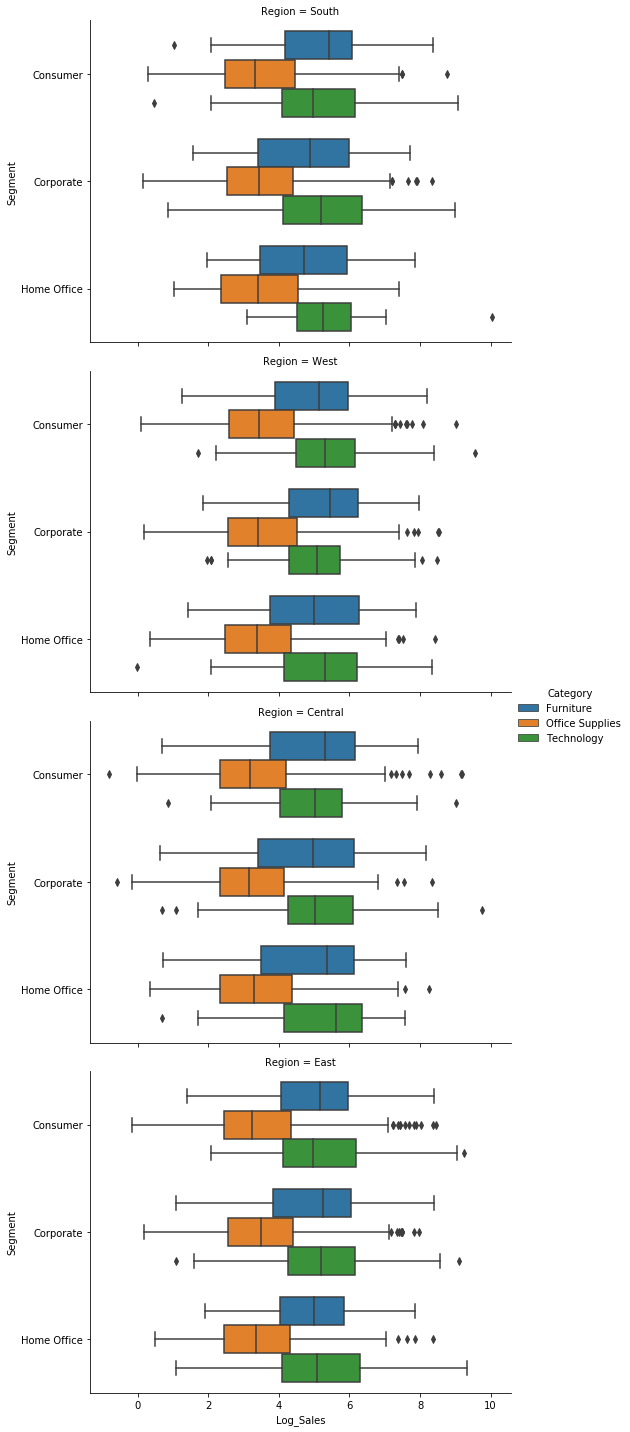

In [43]:
sns.catplot(data=df, x='Log_Sales', y='Segment', hue='Category',kind='box', row='Region', aspect=1.5, height=5)

- The above plots show that the categories are normally distributed

In [46]:
print('Total sales are ' + str(round(df['Sales'].sum(), 2)))

Total sales are 2261536.78
